4. Write a program to clip a polygon using Sutherland Hodgeman algorithm.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
def print_polygon_clipping(window, polygon, polygon_f, fig_size = (16, 6)):
    
    polygon = np.array(polygon)
    polygon = np.concatenate((polygon , polygon[0].reshape(1, -1)), axis=0)

    polygon_f = np.array(polygon_f)
    polygon_f = np.concatenate((polygon_f , polygon_f[0].reshape(1, -1)), axis=0)

    window = np.array(window)
    window = np.concatenate((window , window[0].reshape(1, -1)), axis=0)

    X_LIM_LOWER = min(np.concatenate((polygon[:, 0], window[:, 0]))) - 5
    X_LIM_UPPER = max(np.concatenate((polygon[:, 0], window[:, 0]))) + 5
    Y_LIM_LOWER = min(np.concatenate((polygon[:, 1], window[:, 1]))) - 5
    Y_LIM_UPPER = max(np.concatenate((polygon[:, 1], window[:, 1]))) + 5

    fig, ax =plt.subplots(1, 2, figsize=fig_size)
    for i in range(len(ax)):
        ax[i].set_xlim((X_LIM_LOWER, X_LIM_UPPER))
        ax[i].set_ylim((Y_LIM_LOWER, Y_LIM_UPPER))
        ax[i].plot(window[:, 0], window[:, 1], c='r')
        
    ax[0].set_title("Before clipping", fontsize=16)
    ax[1].set_title("After clipping", fontsize=16)
    
    ax[0].plot(polygon[:, 0], polygon[:, 1])
    ax[1].plot(polygon_f[:, 0], polygon_f[:, 1])
    



In [4]:
def compute_intersect_point(line_1, line_2):
    """ 
    Compute intersect point of two lines.
    Argument:
        line_1 (tuple)  : cordinates of line 1(x1, y1, x2, y2).
        line_2 (tuple)  : cordinates of line 1(x3, y3, x4, y4).
    Return:
        points (tuple)  : intersect coordinate(x, y).
        
    """
    x1, y1, x2, y2 = line_1
    x3, y3, x4, y4 = line_2
    d1_x = ((x4 - x3) * (x1 * y2 - x2 * y1) - (x2 - x1) * (x3 * y4 - x4 * y3))
    d2_x = (y2 - y1) * (x4 - x3) - (y4 - y3) * (x2 - x1)

    x = d1_x / d2_x

    y = (y2 - y1) * (x - x1) / (x4 - x3) + y1

    points = (x, y)
    return points

In [52]:
def polygon_clipping(polygon, window):
    """ 
    Clip a polygon.
    Argument:
        polygon (tuple)         : co-ordinate of polygon(shape(no_of_coordinate, 2))
        window  (tuple)         : co-ordinate of window.
    Return:
        polygon_final (tuple)   : final co-ordinate of polygon(shape(no_of_coordinate, 2))
    """
    m = len(window)
    polygon_org = copy.deepcopy(polygon)
    polygon_f = []

    for i in range(m):
        x1_w, y1_w = window[i]
        x2_w, y2_w = window[(i+1)%m]
        n = len(polygon)
        for j in range(n):
            x1, y1 = polygon[j]
            x2, y2 = polygon[(j+1)%n]

            p1 = (x1 - x1_w) * (y2_w - y1_w) - (y1 - y1_w) * (x2_w - x1_w)
            p2 = (x2 - x1_w) * (y2_w - y1_w) - (y2 - y1_w) * (x2_w - x1_w)
            print("p1=", p1, " ", i,j)
            print("p2=", p2)
            if p1 <= 0 and p2 <= 0:
                polygon_f.append([x2, y2])
            elif p1 <= 0 and p2 > 0:
                x, y = compute_intersect_point((x1_w, y1_w, x2_w, y2_w), (x1, y1, x2, y2))
                polygon_f.append([x, y])
            elif p1 > 0 and p2 <= 0:
                x, y = compute_intersect_point((x1_w, y1_w, x2_w, y2_w), (x1, y1, x2, y2))
                print(x1_w, y1_w, x2_w, y2_w)
                print(x1, y1, x2, y2)
                polygon_f.append([x, y])
                polygon_f.append([x2, y2])
            else:
                pass
            

        polygon = copy.deepcopy(polygon_f)
        polygon_f = []
        print(polygon)

    print_polygon_clipping(window, polygon_org, polygon)


    

4
p1= 6   0 0
p2= 12
p1= 12   0 1
p2= -18
1 1 7 1
2 -1 3 4
p1= -18   0 2
p2= 6
[[2.4, 1.0], [3, 4], [0.75, 1.0]]
p1= -18.4   1 0
p2= -16
p1= -16   1 1
p2= -25.0
p1= -25.0   1 2
p2= -18.4
[[3, 4], [0.75, 1.0], [2.4, 1.0]]
p1= -6   2 0
p2= -24.0
p1= -24.0   2 1
p2= -24.0
p1= -24.0   2 2
p2= -6
[[0.75, 1.0], [2.4, 1.0], [3, 4]]
p1= 1.0   3 0
p2= -5.6
1 5 1 1
0.75 1.0 2.4 1.0
p1= -5.6   3 1
p2= -8
p1= -8   3 2
p2= 1.0
[[1.0, 5.0], [2.4, 1.0], [3, 4], [1.0, 5.0]]


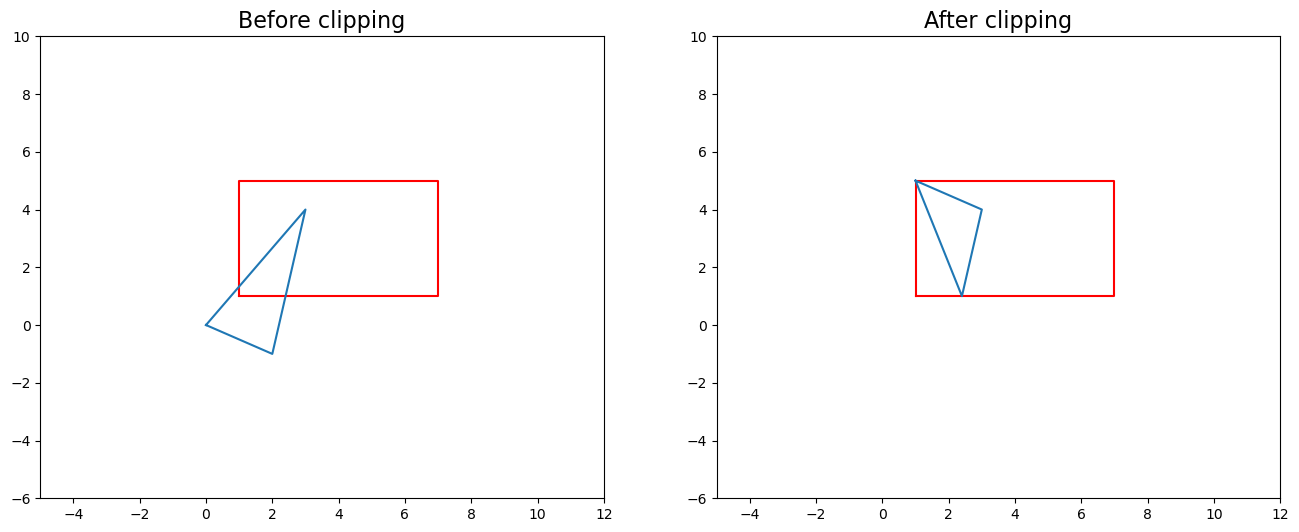

In [53]:
window = ((1, 1), (7, 1), (7, 5), (1, 5))
polygon = [[0, 0], [2, -1], [3, 4]]
# arr1 = np.array(polygon)
# arr2 = np.array(polygon[0]).reshape(1, -1)
# polygon = np.array(polygon)
# polygon = np.concatenate((polygon , polygon[0].reshape(1, -1)), axis=0)
# print(arr1.shape)
# print(arr2.shape)
# polygon = np.concatenate((arr1, arr2), axis=0)
# print(polygon[:, 0])
print(len(window))
# print_polygon_clipping(window, polygon, polygon)
polygon_clipping(polygon, window)

In [51]:
line_1 = (1, 1, 1, 5)
line_2 = (0.75, 1, 2.4, 1)
# 0.75 1.0 2.4 1.0
points = compute_intersect_point(line_1, line_2)
print(points)

(1.0, 5.0)


In [26]:
p1 = [1, 2,3]
p2 = copy.deepcopy(p1)
p1[2] = 0
print(p1, p2)

[1, 2, 0] [1, 2, 3]


In [36]:
x1_w, y1_w = 7, 5
x2_w, y2_w = 7, 1
x1, y1 = 2, 2
p1 = (x1 - x1_w) * (y2_w - y1_w) - (y1 - y1_w) * (x2_w - x1_w)
print(p1)

20
